---
# Exercício Breast Cancer - Balanceamento, kNN, Regressão Logística
---
**Machine Learning em Projetos (Erick Muzart e Fernando melo)**   
Tópicos:
- Knn
- Regressão logística
- Matriz de confusão

<br>
------------------------------------------------



#### **Descrição do projeto de machine learning**
Antes de escrever qualquer código, precisamos entender o problema que queremos resolver e fazer uma descrição eficiente do projeto, visando a comunicação  simples e rápida do objetivo do projeto para técnicos, gestores e colaboradores.  
  
**1- Descrição do problema ou tarefa:**  
Prever se o câncer de mama é maligno ou benigno com base nas características da imagem digitalizada de um aspirado por agulha fina (FNA) de uma massa mamária.   
**2- Descrição da solução de IA:**  
Treinamento supervisionado de modelo de classificação de câncer de mama em 2 classes (benigno/maligno) com base nas características dos núcleos celulares presentes na imagem.   
**3- Fonte de dados:**  
Os dados foram obtidos a partir de uma imagem digitalizada de um aspirado por agulha fina (FNA) de uma massa mamária. Eles descrevem as características dos núcleos celulares presentes na imagem.   
Fonte dados: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html   
**4- Variáveis independentes (preditoras ou "features"):**  
'mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'     
**5- Variável dependente (resposta ou "target"):**  
Tipo de câncer benigno ou maligno

## Carregar bibliotecas

In [ ]:
# Importar bibliotecas pandas, plot_confusion_matrix, train_test_split, matplotlib, seaborn, metrics
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn import metrics
import seaborn as sns

## Análise exploratória dos dados

In [ ]:
# Importar  e instanciar dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
# Converter sklearn dataset em pandas dataframe
df=pd.DataFrame(cancer.data,columns=cancer.feature_names)
# Cria nova coluna target
df['target']= list(pd.Series(cancer.target).astype(int))
# Mostra as dimensões do dataset e as primeiras linhas
print("Dimensões do dataset: ", df.shape)
df.head()

Dimensões do dataset:  (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

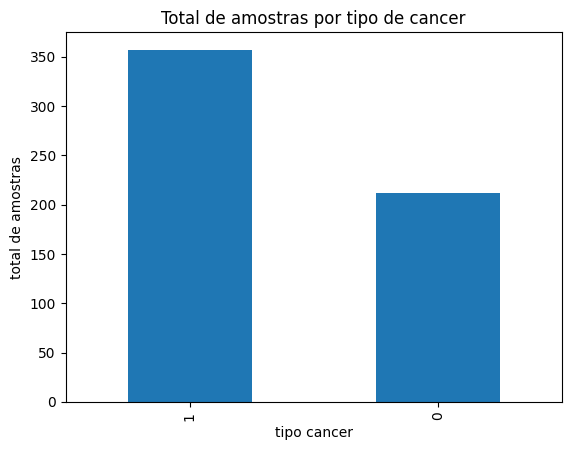

In [ ]:
# Mostra gráfico a dirtibuição de amostras por rótulo da variável dependente("target")
df.target.value_counts().plot(xlabel='tipo cancer', ylabel='total de amostras'
                              , kind='bar',title='Total de amostras por tipo de cancer');

## Pré-processamento

In [ ]:
# Atribuir valores para X e y
X = cancer.data
y = cancer.target
# Mostrar as dimensões de X e y
print('Dimensões de X = ', X.shape)
print('Dimensões de y = ', y.shape)

Dimensões de X =  (569, 30)
Dimensões de y =  (569,)


### Precisa codificar as variáveis?


Encoding das variáveis independentes (features)   
Atenção : Todas as variáveis são numéricas, portanto não faremos codificão de variáveis.

### Precisa Normalizar os dados ?


Abaixo, Podemos verificar que os intervalos de valores das variáveis não estão na mesma escala, portanto a normalização aqui é recomendada.   
Como exemplo, veja a diferença de escala das variáveis abaixo:   
- smooth_error= entre 0,007 e 0,0311.    
- mean_area= entre 143,5 e 2501 .

Normalização dos dados : Por enquanto não faremos o Standard Scaler do Sklearn.

In [ ]:
# Dividir dados em treino e teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Treinamento dos modelos

### Regressão Logística

In [ ]:
# Importar o modelo Regressão Logística
from sklearn.linear_model import LogisticRegression
# Instanciar modelo de regressão logística
reg_log = LogisticRegression(max_iter=3000)
# Treinar o modelo, lembrando de aplicar o encoder nos dados de treinamento
reg_log.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [ ]:
# Verificar a acurácia do modelo (.score)
reg_log.score(X_test, y_test)

0.9766081871345029

In [ ]:
# Verificar o f1_score do modelo, quando as classes estão desbalenceadas
metrics.f1_score(y_test, reg_log.predict(X_test), average='weighted')

0.9766081871345029

## Avaliação da qualidade do melhor modelo

In [ ]:
# Importar a biblioteca (plot_confusion_matrix)
from sklearn.metrics import ConfusionMatrixDisplay

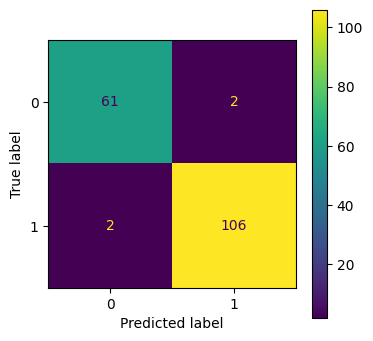

In [ ]:
# Mostrar a Matriz de Confusão para os diversos patamares de renda familiar
fig, ax = plt.subplots(figsize=(4,4))
ConfusionMatrixDisplay.from_estimator(reg_log, X_test, y_test, ax=ax, values_format='d');

## Próximos passos
- Fazer normalização dos dados (Standard Scalar)   
- Treinar outros modelos:   
  - Árvore de decisão (Decision Tree Classifier)   
  - Floresta aleatória (Random Forest Classifier)

In [ ]:
# Árvore de decisão
# Importar o modelo Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9532163742690059

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_class = RandomForestClassifier(n_estimators=300, max_depth=6, random_state=100).fit(X_train, y_train)
rf_class.score(X_test, y_test)

0.9707602339181286

## Balanceamento de classes

### **Undersampling da classe majoritária ( 'bening'('1') )**

Antes: ( bening('1')=357 , malignant('0')=212 )  
TOTAL = 569

Depois: ( bening('1')=212 , malignant('0')=212 )  
TOTAL = 424


In [ ]:
# Importar bibliotecas
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [ ]:
# Atribuir valores para X e y


# Mostrar as dimensões de X e y


# Instanciar RandomUnderSampler

# Treinar e fazer RandomUnderSampler nod dados


# Mostrar as dimensões de X e y


In [ ]:
# Criar datatframe a partir de X_resampled e y_resampled


In [ ]:
# Mostra gráfico a dirtibuição de amostras por rótulo da variável dependente("target")


In [ ]:
# Atribuir valores para X e y a partir do df_undersampled

# Dividir dados em treino e teste (70/30)


In [ ]:
# Regressão logística
# Instanciar modelo 

# Treinar o modelo

# Verificar a acurácia do modelo (.score)


In [ ]:
# Random Forest

# Instanciar modelo 

# Treinar o modelo

# Verificar a acurácia do modelo (.score)


### **Oversampling da classe minoritária ( 'malignant'('0') )**
Antes: ( bening('1')=357 , malignant('0')=212 )  
TOTAL = 569  


Depois: ( bening('1')=357 , malignant('0')=357 )  
TOTAL = 714  


In [ ]:
# Atribuir valores para X e y


# Mostrar as dimensões de X e y

# Instanciar RandomOverSampler

# Treinar e fazer RandomOverSampler nod dados


# Mostrar as dimensões de X e y


In [ ]:
# Criar datatframe a partir de X_resampled e y_resampled


In [ ]:
# Mostra gráfico a dirtibuição de amostras por rótulo da variável dependente("target")


In [ ]:
# Atribuir valores para X e y a partir de df_oversampled

# Dividir dados em treino e teste (70/30)


In [ ]:
# Instanciar modelo de regressão logística

# Treinar o modelo

# Verificar a acurácia do modelo (.score)


In [ ]:
# Random Forest
# Instanciar e Treinar o modelo

# Verificar a acurácia do modelo (.score)


### **Oversampling minoritária e Undersampling da majoritária**
Antes: ( bening('1')=357 , malignant('0')=212 )  
TOTAL = 569  


Depois: ( bening('1')=284 , malignant('0')=284 )  
TOTAL = 570  

In [ ]:
# Atribuir valores para X e y a partir de df


#### OverSamplig minoritária

In [ ]:
# Mostrar distribuição da variável target por classe usando Counter()

# define estratégia oversampling 
 # aumenta minoritária = 80% da majoritária.
# treina e aplica a transformação

# Mostrar distribuição da variável target por classe, usando Counter()


#### UnderSamplig majoritária

In [ ]:
# Mostrar distribuição da variável target por classe, usando Counter()

# define estratégia undersampling 
 # diminui majoritária = minoritária.
# treina e aplica a transformação

# Mostrar distribuição da variável target por classe, usando Counter()


In [ ]:
# Atribuir valores para X e y a partir de X_resampled e y_resampled

# Dividir dados em treino e teste (70/30)


In [ ]:
# Instanciar modelo de regressão logística

# Treinar o modelo

# Verificar a acurácia do modelo (.score)


In [ ]:
# Random Forest
# Instanciar e Treinar o modelo

# Verificar a acurácia do modelo (.score)


### **SMOTE - Oversampling da classe minoritária ( 'malignant'('0') )**

Antes: ( bening('1')=357 , malignant('0')=212 )  
TOTAL = 569  


Depois: ( bening('1')=357 , malignant('0')=357 )  
TOTAL = 714  

In [ ]:
from imblearn.over_sampling import SMOTE

# Atribuir valores para X e y a partir de df


# Mostrar as dimensões de X e y

# Instanciar SMOTE

# Treinar e fazer SMOTE nos dados


# Mostrar as dimensões de X e y


In [ ]:
# Criar datatframe a partir de X_smote e y_smote


In [ ]:
# Mostra gráfico a dirtibuição de amostras por rótulo da variável dependente("target")


In [ ]:
# Atribuir valores para X e y a partir de df

# Dividir dados em treino e teste (70/30)


In [ ]:
# Instanciar modelo de regressão logística

# Treinar o modelo

# Verificar a acurácia do modelo (.score)


In [ ]:
# Random Forest

# Instanciar e Treinar o modelo


# Verificar a acurácia do modelo (.score)


## Conclusão
O melhor balanceamento:  
- Oversampling da classe minoritária ( 'malignant'('0') )

#### **Observação:**  
Por uma questão didática, eu apliquei o balanceamento no dataset completo, mas sugiro aplicar o balanceamento apenas nos dados de treinamento, sem modificar o dataset original.

#FIM